# Example on Knapsack Problem

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import os

os.chdir('..')

In [3]:
from algen.trainer import Trainer

%load_ext autoreload
%autoreload 2

In [4]:
seed = 47
np.random.seed(seed)

N = 15
weights = np.random.choice(np.arange(9) + 1, N, replace=True)
values = np.random.permutation(N) + 1
cap = int(0.3 * weights.sum())

print('Cap     :', cap)
print('Weights :', weights)
print('Values  :', values)

Cap     : 26
Weights : [8 7 8 9 9 4 1 8 1 8 8 2 8 3 3]
Values  : [ 4 10 11  7  1  6 13 14  3  9  5 15  8  2 12]


In [7]:
num_generations = 10
pop_size = 10
crossover_rate = 0.9
mutation_rate = 0.1

def fitness(chromosome):
    genotype = chromosome.genotype
    mask = np.where(genotype == 1)
    v, w = values[mask], weights[mask]
    if w.sum() > cap:
        return 0
    return v.sum()

trainer = Trainer(
    chromosome_type='binary',
    chromosome_length=N,
    fitness_function=fitness,
    pop_size=pop_size,
    selection='rws',
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    seed=seed
)

history = trainer.run(num_generations=num_generations)

[Generation 0] - 0:00:00 - Best fitness: 50.0000 - Average fitness: 39.3000
[Generation 1] - 0:00:00 - Best fitness: 50.0000 - Average fitness: 32.9000
[Generation 2] - 0:00:00 - Best fitness: 53.0000 - Average fitness: 30.7000
[Generation 3] - 0:00:00 - Best fitness: 53.0000 - Average fitness: 39.9000
[Generation 4] - 0:00:00 - Best fitness: 53.0000 - Average fitness: 29.7000
[Generation 5] - 0:00:00 - Best fitness: 53.0000 - Average fitness: 23.8000
[Generation 6] - 0:00:00 - Best fitness: 61.0000 - Average fitness: 34.2000
[Generation 7] - 0:00:00 - Best fitness: 63.0000 - Average fitness: 45.1000
[Generation 8] - 0:00:00 - Best fitness: 63.0000 - Average fitness: 40.6000
[Generation 9] - 0:00:00 - Best fitness: 65.0000 - Average fitness: 52.9000
Best generation : 9
Best fitness    : 65.0000
Best chromosome : BinaryChromosome(length=15, genotype=array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])
Finished in 0:00:00 (avg 0.00s/gen)


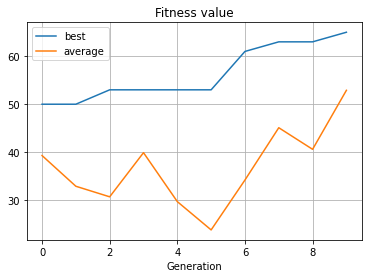

In [8]:
best = history['result'].best
average = history['result'].average
generation = history['result'].generation

plt.plot(best, label='best')
plt.plot(average, label='average')

plt.xticks(generation[::2])
plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.title('Fitness value')
plt.show()